In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

%matplotlib inline
%load_ext autoreload
%autoreload 2

from utils_python.common import *
from utils_fax.helpers_fax_truth import *

import glob
import pickle
import zipfile
import zlib

from pax_utils import utils_waveform_summed
from pax_utils import utils_waveform_channels
from pax_utils import utils_s1s2
from pax_utils import utils_event

from pax import core


In [2]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

dir_in  = '/dali/lgrandi/dbarge/data-xe1t/s2only/fax/'
dir_out = '/dali/lgrandi/dbarge/data-xe1t/s2only/v2019-11-14'


assert(os.path.isdir(dir_out))
assert(os.path.exists(dir_in))


In [19]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

lst_dir = glob.glob(dir_in + "[0-9]*")
lst_dir.sort()
lst_dir.sort(key = len) 
f_hdf    = dir_in + 'data_new.hdf5' # 'data.hdf5'
print(f_hdf)
df       = pd.read_hdf(f_hdf)

df = nsToSamples(df, 's2_center_time')
df = nsToSamples(df, 't_first_electron_true')
df = nsToSamples(df, 't_last_electron_true')
df = nsToSamples(df, 't_first_photon_true')
df = nsToSamples(df, 't_last_photon_true')

print(df.columns)

/dali/lgrandi/dbarge/data-xe1t/s2only/fax/data_new.hdf5
Index(['instruction_ins', 'recoil_type_ins', 'x_ins', 'y_ins', 'depth_ins',
       's1_photons_ins', 's2_electrons_ins', 't_ins', 'fax_truth_peak_id_true',
       'electron_times_true', 'event_true', 'g4_id_true', 'instruction_true',
       'n_electrons_true', 'n_photons_true', 'peak_type_true',
       'repetition_true', 't_first_electron_true', 't_first_photon_true',
       't_interaction_true', 't_last_electron_true', 't_last_photon_true',
       't_mean_electrons_true', 't_mean_photons_true',
       't_sigma_electrons_true', 't_sigma_photons_true', 'top_fraction_true',
       'x_true', 'y_true', 'z_true', 'area_before_largest_s2', 'drift_time',
       'event_duration', 'event_number', 'event_time', 'largest_coincidence',
       'largest_other_s1', 'largest_other_s2', 'largest_unknown',
       'largest_veto', 'max_pretrigger_s2_area', 'n_pretrigger_s2s',
       'run_number', 's1', 's1_area_fraction_top', 's1_range_50p_area', 's2

In [4]:

print(os.path.abspath(f_hdf))
print(df.at[0, 's2_left'])
print(df.at[0, 't_first_electron_true'])


/dali/lgrandi/dbarge/data-xe1t/s2only/fax/data_new.hdf5
22395
22387


xmax_els: 90, bins_els: 90
xmax_phs: 2000, bins_phs: 100


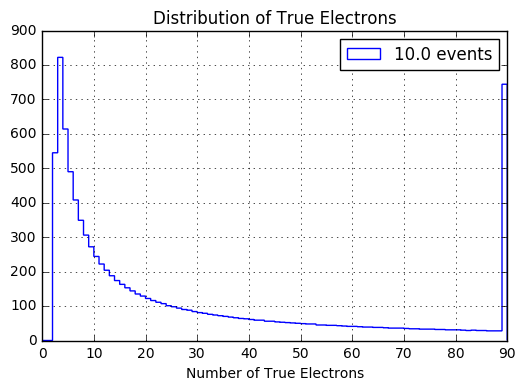

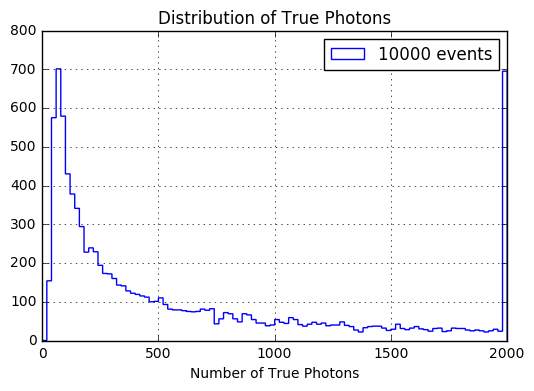

In [5]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

maxRows = 10000
arr_els = df[0:maxRows]['n_electrons_true']
arr_phs = df[0:maxRows]['n_photons_true']

xmax_els = np.amax(arr_els)
xmax_phs = np.amax(arr_phs)

xmax_els = 90
xmax_phs = 2000
bins_els = int(xmax_els)
bins_phs = int(xmax_phs/20)

arr_els = np.clip(arr_els, 0, xmax_els)
arr_phs = np.clip(arr_phs, 0, xmax_phs)

print("xmax_els: {0}, bins_els: {1}".format(xmax_els, bins_els))
print("xmax_phs: {0}, bins_phs: {1}".format(xmax_phs, bins_phs))

plt.figure()
plt.hist(arr_els, bins=bins_els, range=[0, xmax_els], histtype='step', label="{0} events".format(arr_els.size/1000))
plt.xlabel('Number of True Electrons')
plt.title("Distribution of True Electrons")
plt.legend()
plt.grid()


plt.figure()
plt.hist(arr_phs, bins=bins_phs, range=[0, xmax_phs], histtype='step', label="{0} events".format(arr_phs.size))
plt.xlabel('Number of True Photons')
plt.title("Distribution of True Photons")
plt.legend()
plt.grid()


In [6]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

lst_dir = lst_dir[0:10]

print("Input directories:\n")
for x in lst_dir:
    print("   " + x)
print()


Input directories:

   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/0
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/1
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/2
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/3
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/4
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/5
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/6
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/7
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/8
   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/9



In [18]:

f = '/dali/lgrandi/dbarge/data-xe1t/s2only/fax/0/sim_s2s_minitrees.hdf5'
x = pd.read_hdf(f)

for c in x.columns:
    print(c)
    


area_before_largest_s2
drift_time
event_duration
event_number
event_time
largest_coincidence
largest_other_s1
largest_other_s2
largest_unknown
largest_veto
max_pretrigger_s2_area
n_pretrigger_s2s
run_number
s1
s1_area_fraction_top
s1_range_50p_area
s2
s2_1_area
s2_1_area_fraction_top
s2_1_center_time
s2_1_left
s2_1_n_hits
s2_1_pattern_fit
s2_1_range_50p_area
s2_1_range_90p_area
s2_1_rise_time
s2_1_x
s2_1_y
s2_area
s2_area_fraction_top
s2_center_time
s2_left
s2_n_hits
s2_pattern_fit
s2_range_50p_area
s2_range_90p_area
s2_rise_time
s2_x
s2_y
trigger_area
trigger_left_time
trigger_n_contributing_channels
trigger_n_pulses
trigger_right_time
trigger_time_mean
trigger_time_rms
trigger_trigger
trigger_type
x_pax
y_pax
z
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25

In [23]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

n_samples_max = 1000
n_pkl         = 1000
n_zip         = 10
nZipToProcess = n_zip
n_dir         = len(lst_dir)

#------------------------------------------------------------------------------
# Loop over directories
#------------------------------------------------------------------------------

print("\nDirectories: {0}\n".format(n_dir))

for iDir, directory in enumerate(lst_dir):
   
    #--------------------------------------------------------------------------
    # Get list of zip files
    #--------------------------------------------------------------------------

    zip_path = directory + '/sim_s2s/*.zip'
    iDir     = int(os.path.basename(directory))
    
    lst_zip = glob.glob(zip_path)
    lst_zip.sort()
    nThisZip = len(lst_zip)

    print("directory {0}:   {1}".format(iDir, zip_path))
    
    if (nThisZip != n_zip):
        print("Warning! {0} zip files found but expected {1}".format(nThisZip, n_zip))
        print("directory: {0}".format(directory))
        
    assert(nThisZip == n_zip)

    
    #--------------------------------------------------------------------------
    # Initialize output data structured array
    #--------------------------------------------------------------------------
    
    strArr2 = np.zeros(
        n_pkl*n_zip,
        dtype=[
            ('index_left'  , np.int32),
            ('true_left'   , np.int32),
            ('true_right'  , np.int32),
            ('x_ins'       , np.float32),
            ('y_ins'       , np.float32),
            ('x_true'      , np.float32),
            ('y_true'      , np.float32),
            ('true_nels'   , np.int32),
            ('true_nphs'   , np.int32),
            ('x_s2'        , np.float32),
            ('y_s2'        , np.float32),
            ('s2_left'     , np.int32),
            ('s2_right'    , np.int32),
            ('s2_truncated', np.int32),
            ('s2_area'     , np.float32),
            ('image'       , np.float16, (127, n_samples_max) ),
            ('s2_areas'    , np.float16, 127)
        ]
    )
    
    
    #--------------------------------------------------------------------------
    # Loop over zip files
    #--------------------------------------------------------------------------

    for iZip, zipfilename in enumerate(lst_zip):
        
        print("   iZip={0}   {1}".format(iZip, os.path.basename(zipfilename)))
        
        
        #----------------------------------------------------------------------
        #----------------------------------------------------------------------
        
        archive      = zipfile.ZipFile(zipfilename, 'r')
        lst_pklfiles = archive.namelist()
        jsonfilename = os.path.dirname(zipfilename) + '/pax_info.json'
        cfg          = utils_event.getConfig(jsonfilename)
        nPklThisZip  = len(lst_pklfiles)
        
        if (nPklThisZip != n_pkl):
            print("Warning! {0} pkl files found but expected {1}".format(nPklThisZip, n_pkl))
            
        assert(nPklThisZip == n_pkl)
        
        
        #----------------------------------------------------------------------
        # Loop over Pkl Files
        #----------------------------------------------------------------------
        
        for iPkl, pklfilename in enumerate(lst_pklfiles):

            #----------------------------------------------------------------------
            #----------------------------------------------------------------------
            
            idx_arr   = iZip*n_pkl + iPkl
            idx_df    = iDir*n_zip*n_pkl + iZip*n_pkl + iPkl
            
            if (iPkl % 100== 0):
                print("      idx_df={0}, idx_arr={1}, iPkl={2}".format(idx_df, idx_arr, iPkl))
                
            
            #----------------------------------------------------------------------
            #----------------------------------------------------------------------
            
            pklfile      = archive.open(pklfilename)
            event_pkl    = pickle.loads(zlib.decompress(pklfile.read()))
            event_pkl    = utils_event.getVerifiedEvent(event_pkl, verbose=True)
            
            df1          = utils_waveform_channels.getChannelsWaveformsDataFrame(event_pkl, cfg, isStrict=False)
            arr_s2_areas = utils_waveform_summed.getS2IntegralsFromDataFrame(df1)
            
            wf_sum_df    = utils_waveform_summed.getSummedWaveformFromDataFrame(df1, event_pkl.length())
            wf_sum_evt   = utils_waveform_summed.GetSummedWaveformFromEvent(event_pkl)
            arr2d        = utils_waveform_channels.covertChannelWaveformsDataFrametoArray(df1, 0, event_pkl.length())
   
        
            #----------------------------------------------------------------------
            # Sanity
            #----------------------------------------------------------------------

            marg = 1e-1
            
            wf_sum_arr = np.sum(arr2d, axis=0)
            s2_sum_df  = np.sum(arr_s2_areas)
            s2_sum_evt = np.sum(wf_sum_evt)
            
            eq_sumS2_evt_df  = np.isclose(s2_sum_evt, s2_sum_df)
            
            assert(eq_sumS2_evt_df)
            
            arr_diff_sumwf_evt_df  = wf_sum_evt - wf_sum_df
            arr_diff_sumwf_evt_arr = wf_sum_evt - wf_sum_arr
            arr_diff_sumwf_df_arr  = wf_sum_df - wf_sum_arr
            
            eq_sumwf_evt_df  = np.allclose(arr_diff_sumwf_evt_df , np.zeros(arr_diff_sumwf_evt_df.size) , atol=marg, rtol=marg)
            eq_sumwf_evt_arr = np.allclose(arr_diff_sumwf_evt_arr, np.zeros(arr_diff_sumwf_evt_arr.size), atol=marg, rtol=marg)
            eq_sumwf_df_arr  = np.allclose(arr_diff_sumwf_evt_df , np.zeros(arr_diff_sumwf_evt_df.size), atol=marg, rtol=marg)

            assert(eq_sumwf_evt_df)
            assert(eq_sumwf_evt_arr)
            assert(eq_sumwf_df_arr)
            
                
            #assert(eq_sumwf_evt_arr)

            
            #----------------------------------------------------------------------
            # Event data
            #----------------------------------------------------------------------
            
            if (False):
                
                print("true x:  {0:.1f}".format(df.at[idx_df, 'x_true']))
                print("ins x:   {0:.1f}".format(df.at[idx_df, 'x_ins']))
                #print("s2 x:    {0:.1f}".format(dft.at[idx_df, 's2_x']))
                print("s2 x:    {0:.1f}".format(df.at[idx_df, 's2_x']))
                print("pax x:   {0:.1f}".format(df.at[idx_df, 'x_pax']))

            dur_evt       = df.at[idx_df, 'event_duration']
            true_left     = df.at[idx_df, 't_first_electron_true']
            true_right    = df.at[idx_df, 't_last_photon_true']
            true_width    = true_right + 1 - true_left
            true_nels     = df.at[idx_df, 'n_electrons_true']
            true_nphs     = df.at[idx_df, 'n_photons_true']
            s2_left       = df.at[idx_df, 's2_left']
            s2_width      = 2*(df.at[idx_df, 's2_center_time' ] - df.at[idx_df, 's2_left' ])
            s2_right      = s2_left + s2_width
            s2_area       = df.at[idx_df, 's2_area']
            wf_sum_arr    = np.sum(arr2d, axis=0)
            num_s2_samples_truncated = max(s2_width - n_samples_max, 0)
            
            if (dur_evt != event_pkl.duration()):
                print("dur_evt={0}, dur_pkl={1}".format(dur_evt, event_pkl.duration()))
                
            assert(dur_evt == event_pkl.duration())
            
            
            print(arr2d.shape)
    
            print()
            print("S2 Integrals DF:       {0}".format(np.sum(arr_s2_areas)))
            print("S2 Integrals DF:       {0}".format(np.sum(np.sum(arr2d, axis=1))))
            print("S2 Integrals DF (win): {0}".format(np.sum(np.sum(arr2d[:, s2_left:s2_right], axis=1))))
            
            
            #----------------------------------------------------------------------
            # Choose S2 Window
            #----------------------------------------------------------------------
            
            window_left  = min(true_left , s2_left )
            window_right = min(max(true_right, s2_right)+1, window_left + n_samples_max)
            window_width = window_right - window_left
            
            arr2d_s2                    = np.zeros(shape=(arr2d.shape[0], n_samples_max))
            arr2d_s2[:, 0:window_width] = arr2d[:, window_left:window_right]
            arr1d_s2                    = np.sum(arr2d_s2, axis=0)
            arr1d_sum                   = np.sum(arr1d_s2) 
            
            if (arr1d_sum == 0):
                print("Error! Empty waveform")
            
         
            #----------------------------------------------------------------------
            #----------------------------------------------------------------------
            
            if (not eq_sumwf_evt_arr):
                
                xm  = np.amax(np.abs(arr_diff_sumwf_evt_arr))
                xmi = np.argmax(np.abs(arr_diff_sumwf_evt_arr))
                
                print("Max difference: {0}".format(xm))
                print("Max difference: {0}".format(xm))
                print(xmi)
                print(wf_sum_evt.shape)
                print(wf_sum_arr.shape)
                
                plt.figure()
                plt.plot(wf_sum_evt[true_left:true_right], 'r-', label='event')
                plt.plot(wf_sum_arr[true_left:true_right], 'b-', label='arr')
                #plt.plot(wf_sum_df [true_left:true_right], 'g-', label='df')
                plt.legend()
                
                
            #----------------------------------------------------------------------
            #----------------------------------------------------------------------
            
            if (False):
                
                print()
                #print("iPkl:       {0} ".format(iPkl))
                print("true left:  {0} ".format(true_left))
                print("true right: {0} ".format(true_right))
                print("true width: {0} ".format(true_width))
                print("s2 left:    {0} ".format(s2_left))
                print("s2 right:   {0} ".format(s2_right))
                print("s2 width:   {0} ".format(s2_width))
                print("window left: {0}".format(window_left))
                #print("truncated:   {0}".format(num_s2_samples_truncated))
           
            #----------------------------------------------------------------------
            # Save to structured array
            #----------------------------------------------------------------------

            #print(df.columns)
            strArr2[idx_arr]['index_left']   = window_left
            strArr2[idx_arr]['true_left']    = true_left
            strArr2[idx_arr]['true_right']   = true_right
            strArr2[idx_arr]['true_nels']    = true_nels
            strArr2[idx_arr]['true_nphs']    = true_nphs
            strArr2[idx_arr]['x_ins']        = df.at[idx_df, 'x_ins']
            strArr2[idx_arr]['y_ins']        = df.at[idx_df, 'y_ins']            
            strArr2[idx_arr]['x_true']       = df.at[idx_df, 'x_true']
            strArr2[idx_arr]['y_true']       = df.at[idx_df, 'y_true']
            strArr2[idx_arr]['x_s2']         = df.at[idx_df, 's2_x']
            strArr2[idx_arr]['y_s2']         = df.at[idx_df, 's2_y']
            strArr2[idx_arr]['s2_left']      = s2_left
            strArr2[idx_arr]['s2_right']     = s2_right
            strArr2[idx_arr]['s2_truncated'] = num_s2_samples_truncated
            strArr2[idx_arr]['s2_area']      = s2_area
            strArr2[idx_arr]['image']        = arr2d_s2
            strArr2[idx_arr]['s2_areas']     = arr_s2_areas
            
                        
            #----------------------------------------------------------------------
            #----------------------------------------------------------------------
            
            if (False):
                
                print()
                print("iPkl:       {0} ".format(iPkl))
                print("true left:  {0} ".format(true_left))
                print("true right: {0} ".format(true_right))
                print("true width: {0} ".format(true_width))
                print("s2 left:    {0} ".format(s2_left))
                print("s2 right:   {0} ".format(s2_right))
                print("s2 width:   {0} ".format(s2_width))
                print("window left: {0}".format(window_left))
                print("truncated:   {0}".format(num_s2_samples_truncated))
           
        
            #------------------------------------------------------------------
            # End loop over Pkl Files
            #------------------------------------------------------------------
        
            #break
            continue
        
        
        #----------------------------------------------------------------------
        # End loop over Zip Files
        #----------------------------------------------------------------------
       
        #break
        continue
    
    
    #--------------------------------------------------------------------------
    #--------------------------------------------------------------------------
    
    f_out = dir_out + 'arr2_dir{0}.npy'.format(iDir)
    #print("      Output: {0}".format(f_out))
    np.save(f_out.replace('.npy', ''), strArr2)
    
    assert(os.path.exists(f_out))
    
    
    #--------------------------------------------------------------------------
    # End loop on directories
    #--------------------------------------------------------------------------
    
    #break
    continue
    
    
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

print("Done")



Directories: 100

directory 0:   /dali/lgrandi/dbarge/data-xe1t/s2only/fax/0/sim_s2s/*.zip
   iZip=0   XENON1T-0-000000000-000000999-000001000.zip
      idx_df=0, idx_arr=0, iPkl=0
(127, 66858)

S2 Integrals Evt:      152.20394897460938
S2 Integrals DF:       152.2039619324496
S2 Integrals DF (win): 32.31492817905382
(127, 78302)

S2 Integrals Evt:      2503.2900390625
S2 Integrals DF:       2503.2901348242667
S2 Integrals DF (win): 1844.6447087185952
(127, 119762)

S2 Integrals Evt:      805.2656860351562
S2 Integrals DF:       805.2657414479472
S2 Integrals DF (win): 444.66348300098616
(127, 106056)

S2 Integrals Evt:      321.5132141113281
S2 Integrals DF:       321.5132003957333
S2 Integrals DF (win): 112.10226324560062
(127, 74674)

S2 Integrals Evt:      369.0547790527344
S2 Integrals DF:       369.05475385349564
S2 Integrals DF (win): 183.89031412592158
(127, 84298)

S2 Integrals Evt:      184.22119140625
S2 Integrals DF:       184.22117810072086
S2 Integrals DF (win): 54.50683

KeyboardInterrupt: 